<a href="https://colab.research.google.com/github/Sirfowahid/DL_Project_02/blob/main/DLProject02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython import display
display.set_matplotlib_formats('svg')

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader


In [3]:
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data = pd.read_csv(url,sep=',',header=None)

In [4]:
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','DISEASE']

data = data.replace('?',np.nan).dropna()

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,DISEASE
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


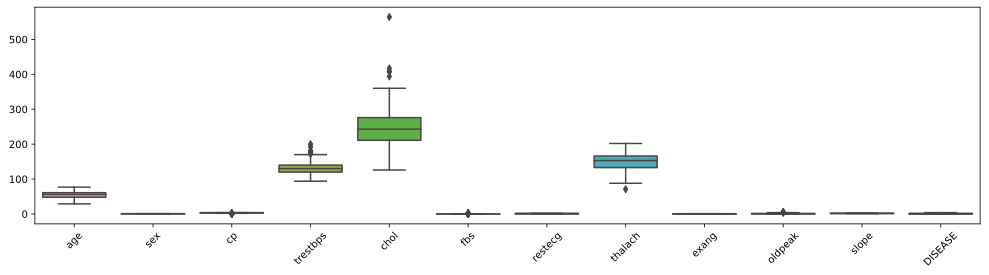

In [6]:
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [7]:
col2zscore = data.keys()
col2zscore = col2zscore.drop(['sex','fbs','exang','DISEASE'])
col2zscore

for c in col2zscore:
  d = pd.to_numeric(data[c])
  data[c] = (d-d.mean())/d.std(ddof=1)

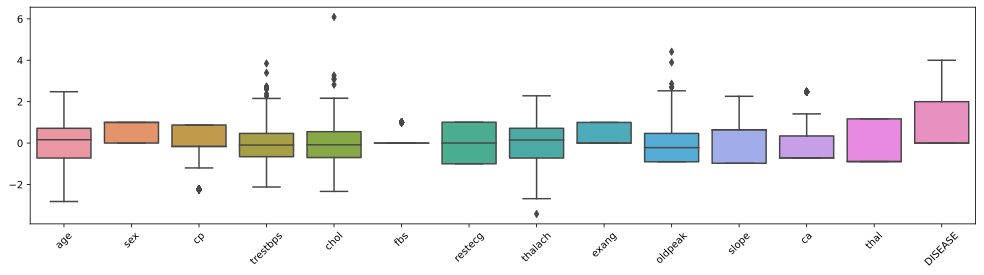

In [8]:
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [9]:
data['DISEASE'].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: DISEASE, dtype: int64

In [10]:
data['DISEASE'][data['DISEASE']>0] = 1

<ipython-input-10-21479dcd4b79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISEASE'][data['DISEASE']>0] = 1


In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,0.934603,1.0,-2.236854,0.749116,-0.275978,1.0,1.008496,0.017465,0.0,1.067164,2.260330,-0.720760,0.654772,0
1,1.376605,1.0,0.872408,1.593577,0.743301,0.0,1.008496,-1.813274,1.0,0.381130,0.642696,2.474249,-0.892713,1
2,1.376605,1.0,0.872408,-0.658320,-0.352904,0.0,1.008496,-0.897904,1.0,1.324427,0.642696,1.409246,1.170601,1
3,-1.938409,1.0,-0.164013,-0.095345,0.050961,0.0,-1.001728,1.630258,0.0,2.096215,2.260330,-0.720760,-0.892713,0
4,-1.496407,0.0,-1.200433,-0.095345,-0.833696,0.0,1.008496,0.976423,0.0,0.295376,-0.974938,-0.720760,-0.892713,0


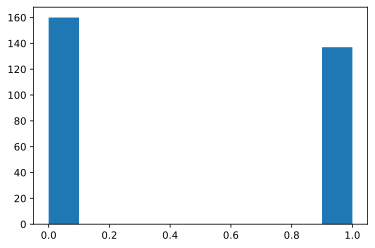

In [12]:
plt.hist(data['DISEASE'])
plt.show()

In [13]:
dataT  = torch.tensor( data[data.keys().drop('DISEASE')].values ).float()
labels = torch.tensor( data['DISEASE'].values ).float()

print( dataT.shape )
print( labels.shape )

labels = labels[:,None]
print( labels.shape )

torch.Size([297, 13])
torch.Size([297])
torch.Size([297, 1])


In [14]:

train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=50)

train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

batchsize    = 20
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [15]:

for X,y in train_loader:
  print(X.shape,  y.shape)

torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])


In [16]:

class theNet(nn.Module):
  def __init__(self):
    super().__init__()

    
    self.input = nn.Linear(13,32)
    
    
    self.fc1 = nn.Linear(32,64)
    self.fc2 = nn.Linear(64,10)

    
    self.output = nn.Linear(10,1)
  
  
  def forward(self,x):
    x = F.relu( self.input(x) )
    x = F.relu( self.fc1(x) )
    x = F.relu( self.fc2(x) )
    return self.output(x)

In [17]:
net = theNet()

X,y = next(iter(train_loader))
yHat = net(X)
print(yHat)

lossfun = nn.BCEWithLogitsLoss()
lossfun(yHat,y)

tensor([[-0.0572],
        [-0.0493],
        [-0.0597],
        [-0.0507],
        [-0.0641],
        [-0.0363],
        [-0.0659],
        [-0.0435],
        [-0.0533],
        [-0.0275],
        [-0.0413],
        [-0.0449],
        [-0.0647],
        [-0.0506],
        [-0.0581],
        [-0.0304],
        [-0.0440],
        [-0.0469],
        [-0.0631],
        [-0.0522]], grad_fn=<AddmmBackward0>)


tensor(0.7062, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [18]:

net = theNet()
optimizer = torch.optim.Adam(net.parameters(),lr=.0001)
lossfun = nn.BCEWithLogitsLoss() 

numepochs = 100

trainLoss = torch.zeros(numepochs)
testLoss  = torch.zeros(numepochs)
trainAcc  = torch.zeros(numepochs)
testAcc   = torch.zeros(numepochs)



In [20]:
for epochi in range(numepochs):

  
  batchLoss = []
  for X,y in train_loader:

    
    yHat = net(X)
    loss = lossfun(yHat,y)

    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
    batchLoss.append(loss.item())
    
    
    predictions = (torch.sigmoid(yHat)>.5).float()
    trainAcc[epochi] = 100*torch.mean((predictions==y).float())
  trainLoss[epochi] = np.mean(batchLoss)


  X,y = next(iter(test_loader))
  yHat = net(X)
  
  
  loss = lossfun(yHat,y)
  testLoss[epochi] = loss.item()
  
  
  predictions = (torch.sigmoid(yHat)>.5).float()
  testAcc[epochi] = 100*torch.mean((predictions==y).float())  

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(trainLoss,'s-',label='Train')
ax[0].plot(testLoss,'s-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,'s-',label='Train')
ax[1].plot(testAcc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()